In [1]:

import pandas as pd
import numpy as np
import pickle
import torch
import torch.nn as nn

/home/jhmoon/venvFL/env/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [75]:
with open('/home/jhmoon/venvFL/2023-paper-Federated_Learning/multiFL/sensIT/weights/acoustic_weights.pickle', 'rb') as f:
    w1 = pickle.load(f)
with open('/home/jhmoon/venvFL/2023-paper-Federated_Learning/multiFL/sensIT/weights/seismic_weights.pickle', 'rb') as f:
    w2 = pickle.load(f)

with open('/home/jhmoon/venvFL/2023-paper-Federated_Learning/multiFL/sensIT/weights/combined_weights.pickle', 'rb') as f:
    w3 = pickle.load(f)

In [79]:
(w1[5] + w2[5] + w3[5]) / 3

array([-0.05136744, -0.01068934,  0.11794728, -0.02579669, -0.05502301,
       -0.01784686,  0.0207103 ,  0.04767637,  0.0264596 , -0.0247092 ,
        0.0385161 , -0.03474554,  0.07166098, -0.05569336, -0.00685678,
       -0.00425166], dtype=float32)

In [77]:
w2[5]

array([-0.03837988,  0.01442479,  0.15859035, -0.01543127, -0.03818664,
       -0.17263052,  0.01694121, -0.1450823 ,  0.16155712,  0.15163194,
        0.05209659,  0.03644113, -0.02476314, -0.07485858,  0.0481822 ,
       -0.11018977], dtype=float32)

In [78]:
w3[5]

array([ 2.21762918e-02, -6.32209927e-02,  9.11262184e-02,  8.37491229e-02,
       -8.45408067e-05,  2.89875939e-02,  1.42850429e-01,  1.98758051e-01,
       -1.98233463e-02, -1.50281668e-01, -1.49214804e-01, -1.54517591e-01,
        2.34631039e-02, -2.07926761e-02,  1.12504534e-01, -1.21740341e-01],
      dtype=float32)

In [32]:
class FCNet16(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(100, 32)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(32, 32)
        self.act2 = nn.ReLU()
        self.layer3 = nn.Linear(32, 16)
        self.act3 = nn.ReLU()
        self.output = nn.Linear(16, 1)
        self.dropout = nn.Dropout(0.25)
        self.sigmoid = nn.Sigmoid()
 
    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.dropout(x)
        x = self.act2(self.layer2(x))
        x = self.dropout(x)
        x = self.act3(self.layer3(x))
        x = self.dropout(x)
        x = self.sigmoid(self.output(x))
        return x
    
modelc = FCNet16()

In [34]:
class FCNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(50, 16)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(16, 32)
        self.act2 = nn.ReLU()
        self.layer3 = nn.Linear(32, 16)
        self.act3 = nn.ReLU()
        self.output = nn.Linear(16, 1)
        self.dropout = nn.Dropout(0.25)
        self.sigmoid = nn.Sigmoid()
 
    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.dropout(x)
        x = self.act2(self.layer2(x))
        x = self.dropout(x)
        x = self.act3(self.layer3(x))
        x = self.dropout(x)
        x = self.sigmoid(self.output(x))
        return x
    
model = FCNet()

In [35]:
modelc

FCNet16(
  (layer1): Linear(in_features=100, out_features=32, bias=True)
  (act1): ReLU()
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (act2): ReLU()
  (layer3): Linear(in_features=32, out_features=16, bias=True)
  (act3): ReLU()
  (output): Linear(in_features=16, out_features=1, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (sigmoid): Sigmoid()
)

In [36]:
model

FCNet(
  (layer1): Linear(in_features=50, out_features=16, bias=True)
  (act1): ReLU()
  (layer2): Linear(in_features=16, out_features=32, bias=True)
  (act2): ReLU()
  (layer3): Linear(in_features=32, out_features=16, bias=True)
  (act3): ReLU()
  (output): Linear(in_features=16, out_features=1, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (sigmoid): Sigmoid()
)

In [27]:
for i in range(6):
    print(w1[i].shape)

(16, 50)
(16,)
(32, 16)
(32,)
(16, 32)
(16,)


In [53]:
w1[4]

array([[ 3.59188132e-02, -5.14878444e-02,  8.75409991e-02,
         6.79627657e-02, -1.71455920e-01,  6.15246445e-02,
         7.45348558e-02,  3.69016714e-02, -1.07306421e-01,
        -1.19103733e-02,  1.45163372e-01,  1.35407478e-01,
        -3.57782543e-02, -6.39051571e-03, -1.72114789e-01,
        -6.27254918e-02,  4.06445712e-02, -1.28379047e-01,
         3.92246395e-02, -3.47248241e-02, -1.13379084e-01,
         1.15572572e-01, -1.46451667e-01,  4.06639650e-02,
        -1.70991898e-01, -1.79062501e-01, -6.30293638e-02,
         1.44365449e-02, -9.60195363e-02, -1.45050228e-01,
         1.27822412e-02, -1.26913130e-01],
       [ 2.14959562e-01, -4.17194106e-02,  2.34343842e-01,
         2.06334382e-01, -6.40148744e-02,  1.38760403e-01,
         1.21475821e-02, -3.22261220e-03, -1.46124974e-01,
         9.54363942e-02, -4.42648716e-02,  3.86822745e-02,
         1.89686209e-01, -1.50597513e-01,  2.78705228e-02,
        -8.46901834e-02, -5.41539527e-02,  2.74236798e-02,
         1.27

In [28]:
for i in range(6):
    print(w2[i].shape)

(16, 50)
(16,)
(32, 16)
(32,)
(16, 32)
(16,)


In [29]:
for i in range(6):
    print(w3[i].shape)

(32, 100)
(32,)
(32, 32)
(32,)
(16, 32)
(16,)


In [40]:
w3[3].shape

(32,)

In [45]:
model.parameters()

<generator object Module.parameters at 0x7f02fef60f50>

In [70]:
def avg_parameter(modals):
    parameters = []
    for i in modals:
        with open('/home/jhmoon/venvFL/2023-paper-Federated_Learning/multiFL/sensIT/weights/'+i+'_weights.pickle', 'rb') as f:
            data = pickle.load(f)
            parameters.append(data)
    parameters[2][4] = (parameters[0][4] + parameters[1][4] + parameters[2][4]) / 3
    parameters[2][5] = (parameters[0][5] + parameters[1][5] + parameters[2][5]) / 3
    return parameters[2]

# net = model().to(DEVICE)
# net_State_dict = net.state_dict().keys()
# trainloader, testloader, num_examples = load_data(batch_size)
# agg = avg_parameter(cn)
# set_parameters(net, net_State_dict, agg)
# loss, accuracy = test(net, testloader)

In [71]:
modals = ['acoustic','seismic','combined']
avg = avg_parameter(modals)

In [73]:
avg[5]

array([-0.05136744, -0.01068934,  0.11794728, -0.02579669, -0.05502301,
       -0.01784686,  0.0207103 ,  0.04767637,  0.0264596 , -0.0247092 ,
        0.0385161 , -0.03474554,  0.07166098, -0.05569336, -0.00685678,
       -0.00425166], dtype=float32)

In [46]:
param = []
modals = ['acoustic','seismic','combined']
for i in modals:
    with open('/home/jhmoon/venvFL/2023-paper-Federated_Learning/multiFL/sensIT/weights/'+i+'_weights.pickle', 'rb') as f:
        data = pickle.load(f)
        param.append(data)

In [74]:
w3[5]

array([ 2.21762918e-02, -6.32209927e-02,  9.11262184e-02,  8.37491229e-02,
       -8.45408067e-05,  2.89875939e-02,  1.42850429e-01,  1.98758051e-01,
       -1.98233463e-02, -1.50281668e-01, -1.49214804e-01, -1.54517591e-01,
        2.34631039e-02, -2.07926761e-02,  1.12504534e-01, -1.21740341e-01],
      dtype=float32)

In [62]:
w3[4] = (w3[4] + w1[4] + w2[4])/3

In [64]:
w3[4].shape

(16, 32)

In [69]:
w3[4]

array([[-1.56538934e-02,  2.58936789e-02,  9.43701863e-02,
        -3.45943384e-02, -2.92669013e-02,  3.15130465e-02,
         2.04601567e-02,  9.41406265e-02, -3.51134911e-02,
        -1.96896624e-02,  6.59236982e-02,  7.00526452e-03,
        -4.36005779e-02, -1.24562373e-02, -2.72063110e-02,
         1.83599964e-02,  3.02435812e-02,  2.44977623e-02,
         1.33851776e-02,  1.09717986e-02, -4.91452031e-02,
         1.81242917e-02, -9.55896005e-02, -1.71011630e-02,
        -4.93805520e-02, -9.10151377e-02, -3.01753986e-03,
        -3.06558553e-02, -1.03455573e-01, -9.18908790e-02,
         3.89289930e-02, -9.69082788e-02],
       [ 6.82978109e-02,  3.65456529e-02,  1.69658005e-01,
         4.75931428e-02, -5.55941574e-02,  1.04382843e-01,
         3.65208052e-02,  4.64008749e-03,  2.19791289e-02,
        -4.14621942e-02, -2.26085749e-03,  1.42985815e-02,
         1.28120199e-01, -1.97776631e-02, -6.03344552e-02,
        -6.07867129e-02,  9.06777084e-02, -1.41598089e-02,
        -2.00

In [3]:
import torch.nn as nn

In [4]:
class FCNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(50, 32)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(32, 32)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.25)
        self.sigmoid = nn.Sigmoid()
 
    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.dropout(x)
        x = self.act2(self.layer2(x))
        x = self.dropout(x)
        x = self.sigmoid(self.output(x))
        return x

In [5]:
model = FCNet()

In [6]:
model

FCNet(
  (layer1): Linear(in_features=50, out_features=32, bias=True)
  (act1): ReLU()
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (sigmoid): Sigmoid()
)

In [6]:
with open('./sensIT/weights/acoustic_weights3.pickle', 'rb') as f:
    weights = pickle.load(f)

In [7]:
weights[0]

array([[-0.05269472, -0.07572538, -0.12464927,  0.08684625, -0.07100642,
        -0.1465292 , -0.04022191,  0.14631143,  0.05192941,  0.19336174,
        -0.06426375, -0.02924388,  0.08495466,  0.0987336 ,  0.08774199,
        -0.11030853, -0.04703886,  0.02862654,  0.12478018,  0.13732854,
         0.17177291,  0.01660683, -0.08944565, -0.03193239,  0.04251293,
         0.05000366, -0.04295456, -0.14764123,  0.12235659,  0.02213123,
        -0.02145025,  0.04203653, -0.05183765, -0.0729872 , -0.03137212,
        -0.10269548, -0.14887835,  0.06550459,  0.08651358, -0.12806472,
        -0.10444613, -0.14694321, -0.04647597,  0.03605582, -0.00092418,
        -0.06447226, -0.09849437, -0.13432784, -0.13687912, -0.0452068 ],
       [ 0.11010823,  0.03978969,  0.03663189, -0.01837768,  0.07527626,
        -0.09598243, -0.1282576 , -0.01394953,  0.03246918, -0.15688106,
        -0.19083965,  0.01965441, -0.09618739, -0.04707525, -0.10231547,
         0.07353466,  0.00949854, -0.07924183, -0.

In [23]:
len(weights)

6

In [28]:
weights[3].shape

(32,)

In [19]:
weights[0]

array([[ 0.10086954,  0.06878963,  0.08005698, ...,  0.15775609,
         0.14401074, -0.05876457],
       [-0.01333562,  0.06856151, -0.08055982, ..., -0.0052242 ,
         0.08033251, -0.07026368],
       [ 0.03320311, -0.01273503,  0.01696842, ...,  0.03464549,
        -0.01665695,  0.0676046 ],
       ...,
       [ 0.00676149, -0.025201  , -0.04070447, ..., -0.03987937,
         0.03337328, -0.00652023],
       [-0.11801173, -0.05857294, -0.1343787 , ...,  0.01572396,
        -0.01279473, -0.08925074],
       [ 0.03500291,  0.03294956,  0.07910588, ..., -0.00331527,
         0.16318636,  0.04994968]], dtype=float32)

In [18]:
weights[1]

array([ 0.02392583,  0.022886  ,  0.04430712,  0.16479689, -0.04792076,
        0.04154822,  0.05102421,  0.05027459,  0.10101664,  0.01596454,
       -0.03149255, -0.06205002, -0.0359641 ,  0.16576096,  0.04464404,
        0.08389597,  0.10144539,  0.00506641, -0.06978582,  0.1602873 ,
        0.1624929 , -0.03591912, -0.08976859,  0.1608417 ,  0.05119436,
       -0.06758171,  0.12821636,  0.06924597,  0.03548355, -0.02893788,
       -0.03445384,  0.06758168], dtype=float32)

In [17]:
weights[2]

array([[ 0.11574775,  0.18805556, -0.12686212, ...,  0.07104282,
         0.02881023,  0.1103281 ],
       [-0.06018356,  0.16588335, -0.12706633, ..., -0.01537679,
         0.15747002,  0.14809306],
       [-0.11010967, -0.11483313,  0.11144786, ...,  0.10855987,
         0.08479732, -0.11836247],
       ...,
       [ 0.10043849,  0.13617554,  0.00057123, ..., -0.08014009,
        -0.1311242 ,  0.06569213],
       [-0.10145426, -0.11184802,  0.05232888, ...,  0.06034911,
         0.04916368, -0.06985772],
       [ 0.00847284,  0.06944747, -0.12761769, ...,  0.04381965,
         0.12714383,  0.00459827]], dtype=float32)

In [16]:
weights[3]

array([-0.0236446 ,  0.1458096 , -0.17165926, -0.11603329, -0.11985242,
        0.12273674,  0.20738502, -0.07353698, -0.11665504,  0.12361523,
        0.15925774, -0.0701796 ,  0.08935406, -0.04457862, -0.21961895,
        0.13778266, -0.06480497,  0.11091693, -0.16276148, -0.04102593,
        0.01432918,  0.05203295, -0.15221974, -0.06377535, -0.21660683,
       -0.0762635 , -0.09804313,  0.09295543,  0.03463103,  0.18538389,
       -0.08742815,  0.00309704], dtype=float32)

In [15]:
weights[4]

array([[ 0.1630209 , -0.19284661, -0.01000647,  0.18448794, -0.02678821,
        -0.18696201,  0.21996994,  0.16226852,  0.13917652,  0.22758749,
         0.02410716, -0.14666255,  0.03210544, -0.20691681,  0.01848032,
         0.06569813,  0.21668425, -0.16463238,  0.08224878, -0.03252516,
        -0.16602828, -0.04860615, -0.01677009, -0.20278755,  0.03553231,
        -0.07996865, -0.19176085, -0.18562369, -0.03954156,  0.17759772,
        -0.05036113, -0.18426996]], dtype=float32)

In [14]:
weights[5]

array([0.15250455], dtype=float32)

In [2]:
with open('/home/jhmoon/venvFL/2023-paper-Federated_Learning/Data/trainset5000.pickle', 'rb') as trs:
    trainset = pickle.load(trs)

/home/jhmoon/venvFL/env/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open('../Data/combined.pickle', 'rb') as f:
    data1 = pickle.load(f)

In [4]:
acoustic = pd.read_csv('../Data/combined.csv')

In [3]:
data1

,class,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,0,-0.136421,-0.092407,-0.131769,0.574799,-0.073130,0.021133,0.099456,1.000000,0.614752,...,-0.042590,-0.045936,-0.045755,-0.045720,-0.045836,-0.045605,-0.044757,-0.046381,-0.043888,-0.045910
1,1,0.197980,0.300174,0.130691,0.802940,1.000000,0.099832,-0.009243,0.350689,0.281720,...,-0.063700,-0.047797,-0.032164,-0.056727,-0.064532,-0.039657,-0.054612,-0.004255,-0.046586,-0.053346
2,1,-0.025860,-0.022162,-0.011926,0.028807,1.000000,0.056446,-0.007109,-0.021850,-0.023420,...,-0.052146,-0.050673,-0.051639,-0.048836,-0.054181,-0.047452,-0.049558,-0.053643,-0.042383,-0.051040
3,1,0.001899,-0.002187,0.013058,0.068607,1.000000,0.022435,-0.007101,-0.021454,0.013644,...,-0.023600,-0.028287,-0.026214,-0.028059,-0.024962,-0.028616,-0.024203,-0.028573,-0.022171,-0.015671
4,0,-0.025614,-0.022154,-0.009857,-0.020623,-0.004027,0.004455,0.040029,1.000000,0.014854,...,-0.033608,-0.033621,-0.033741,-0.033709,-0.033714,-0.033571,-0.033738,-0.033518,-0.033763,-0.033451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9890,0,-0.048292,-0.028895,-0.073574,-0.044289,-0.056595,1.000000,0.299701,0.484055,0.155229,...,-0.049808,-0.049843,-0.049823,-0.049841,-0.049847,-0.049845,-0.049785,-0.049840,-0.049828,-0.049845
9891,1,-0.028897,-0.028682,-0.026319,-0.023884,-0.028318,-0.012052,1.000000,-0.017358,0.065285,...,-0.057930,-0.055839,-0.054828,-0.055795,-0.058072,-0.056406,-0.050392,-0.051066,-0.057689,-0.058265
9892,0,-0.120733,-0.118573,1.000000,0.020786,0.550914,-0.026189,0.312667,-0.111190,-0.027472,...,-0.043245,-0.043054,-0.043323,-0.043269,-0.043363,-0.042998,-0.043253,-0.043255,-0.043361,-0.043318
9893,1,-0.036163,-0.005236,0.032165,0.073736,1.000000,0.092622,-0.029374,-0.037146,-0.013042,...,-0.006806,-0.052534,-0.038917,-0.039336,0.015867,-0.052018,-0.044556,-0.046317,-0.016849,-0.036681


In [2]:
# ac = pd.read_csv('../Data/acoustic.csv')
se = pd.read_csv('../Data/seismic.csv')
# cc = pd.read_csv('../Data/combined.csv')

In [3]:
se

,2,1:-3.4982716e-02,2:5.7788628e-02,3:1.0000000e+00,4:2.6936021e-01,5:-2.8264136e-02,6:7.6670991e-02,7:6.2264464e-02,8:-3.1420025e-02,9:-2.9930195e-02,...,41:-3.3730718e-02,42:-3.3542211e-02,43:-3.4906283e-02,44:-3.4748168e-02,45:-2.9978768e-02,46:-3.3060970e-02,47:-3.3817527e-02,48:-3.3966031e-02,49:-3.4729995e-02,50:-3.2716626e-02
0,1,1:-5.1849378e-02,2:-4.2680132e-02,3:-2.8819241e-03,4:-2.5115889e-02,5:2.1461595e-01,6:6.4167417e-01,7:1.0000000e+00,8:3.9161957e-01,9:-5.0202698e-02,...,41:-5.1841424e-02,42:-5.1839214e-02,43:-5.1830198e-02,44:-5.1845762e-02,45:-5.1848139e-02,46:-5.1829101e-02,47:-5.1826584e-02,48:-5.1848286e-02,49:-5.1824183e-02,50:-5.1829871e-02
1,2,1:-3.4295460e-02,2:7.6742839e-02,3:1.0000000e+00,4:4.5559624e-02,5:1.1764126e-01,6:6.8304348e-02,7:1.6887426e-03,8:8.4685500e-02,9:-2.8929260e-02,...,41:-3.4040405e-02,42:-3.3776145e-02,43:-3.4022349e-02,44:-3.4178248e-02,45:-3.4074019e-02,46:-3.3872617e-02,47:-3.3649546e-02,48:-3.4274589e-02,49:-3.4265065e-02,50:-3.4100377e-02
2,1,1:-2.3942332e-02,2:1.2833276e-02,3:-1.7787523e-02,4:1.0000000e+00,5:3.3576951e-02,6:7.0547821e-04,7:-1.9219766e-02,8:-1.4191202e-02,9:-1.8693280e-02,...,41:-2.3158059e-02,42:-2.3484799e-02,43:-2.3447458e-02,44:-2.3908373e-02,45:-2.3280421e-02,46:-2.3052432e-02,47:-2.3911310e-02,48:-2.3907119e-02,49:-2.3809849e-02,50:-2.3557708e-02
3,2,1:-5.4242307e-02,2:4.9151364e-01,3:1.0000000e+00,4:7.7560303e-01,5:-3.7624699e-02,6:-7.6039432e-03,7:-1.1481427e-02,8:-2.4952626e-02,9:-5.4104039e-02,...,41:-5.3312166e-02,42:-5.3959379e-02,43:-5.3684981e-02,44:-5.3928275e-02,45:-5.3135851e-02,46:-5.2220915e-02,47:-5.2614039e-02,48:-5.3295985e-02,49:-5.3564727e-02,50:-5.3680860e-02
4,3,1:-7.9571113e-02,2:1.0000000e+00,3:-6.2186911e-02,4:-6.4824088e-02,5:-6.3454754e-02,6:-5.8653649e-02,7:7.5783897e-02,8:-5.7125257e-02,9:4.4708747e-02,...,41:-2.7824864e-02,42:-7.0962536e-02,43:6.4107625e-03,44:-7.2813468e-02,45:-7.7507224e-02,46:-1.4797116e-02,47:-4.4045289e-02,48:1.8362269e-02,49:1.4165072e-01,50:-2.3467514e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19699,3,1:-4.8234266e-02,2:1.0000000e+00,3:3.8487223e-01,4:2.5542114e-01,5:7.8601791e-02,6:-3.5010054e-02,7:-3.1359988e-02,8:-4.4958714e-02,9:-2.5651113e-02,...,41:-4.0382486e-02,42:-4.3646419e-02,43:-4.3944829e-02,44:-4.1997455e-02,45:-4.4119770e-02,46:-4.7496945e-02,47:-4.1248383e-02,48:-2.1951473e-02,49:-3.8989705e-02,50:-2.6274046e-02
19700,3,1:-3.9427390e-02,2:2.5017500e-01,3:1.0000000e+00,4:4.7209344e-01,5:-1.0389634e-02,6:-1.2245046e-02,7:-1.5281884e-02,8:-3.0070475e-02,9:-3.8156644e-02,...,41:-3.8596350e-02,42:-3.8652110e-02,43:-3.8964056e-02,44:-3.9413418e-02,45:-3.9225058e-02,46:-3.9390653e-02,47:-3.9143348e-02,48:-3.9417448e-02,49:-3.9145719e-02,50:-3.8789793e-02
19701,1,1:-3.0935929e-02,2:1.6466759e-01,3:1.0000000e+00,4:-9.9501137e-04,5:-8.8667641e-03,6:2.8244352e-02,7:-2.9840768e-02,8:-2.9962926e-02,9:-2.8405974e-02,...,41:-2.8584398e-02,42:-2.3978280e-02,43:-2.7623624e-02,44:-2.9363144e-02,45:-2.6537855e-02,46:-3.0360930e-02,47:-3.0515965e-02,48:-2.6627307e-02,49:-2.8351462e-02,50:-2.9199644e-02
19702,2,1:-5.7572746e-02,2:1.1674551e-01,3:1.0000000e+00,4:9.6301950e-01,5:-2.4935853e-03,6:-3.8127782e-02,7:-5.5621692e-02,8:-4.6119508e-02,9:-3.7567807e-02,...,41:-4.1120748e-02,42:-8.8304852e-03,43:-3.4667937e-02,44:-3.6773200e-02,45:-5.4070931e-02,46:-4.9789929e-02,47:-5.6431024e-02,48:-4.7229669e-02,49:-4.2062541e-02,50:-5.6638939e-02


In [7]:
def prep(df):
    pre_col = df.columns.tolist()
    new_col = [x for x in range(50)]
    new_col = ['class'] + new_col
    df.columns = new_col
    pre_col = np.array(pre_col).reshape(1, -1)
    new_df = pd.DataFrame(pre_col, columns = new_col)
    con_df = pd.concat([new_df, df])
    con_df = con_df.reset_index(drop = True)
    return con_df
    

In [8]:
df = prep(se)

In [9]:
df

,class,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,2,1:-3.4982716e-02,2:5.7788628e-02,3:1.0000000e+00,4:2.6936021e-01,5:-2.8264136e-02,6:7.6670991e-02,7:6.2264464e-02,8:-3.1420025e-02,9:-2.9930195e-02,...,41:-3.3730718e-02,42:-3.3542211e-02,43:-3.4906283e-02,44:-3.4748168e-02,45:-2.9978768e-02,46:-3.3060970e-02,47:-3.3817527e-02,48:-3.3966031e-02,49:-3.4729995e-02,50:-3.2716626e-02
1,1,1:-5.1849378e-02,2:-4.2680132e-02,3:-2.8819241e-03,4:-2.5115889e-02,5:2.1461595e-01,6:6.4167417e-01,7:1.0000000e+00,8:3.9161957e-01,9:-5.0202698e-02,...,41:-5.1841424e-02,42:-5.1839214e-02,43:-5.1830198e-02,44:-5.1845762e-02,45:-5.1848139e-02,46:-5.1829101e-02,47:-5.1826584e-02,48:-5.1848286e-02,49:-5.1824183e-02,50:-5.1829871e-02
2,2,1:-3.4295460e-02,2:7.6742839e-02,3:1.0000000e+00,4:4.5559624e-02,5:1.1764126e-01,6:6.8304348e-02,7:1.6887426e-03,8:8.4685500e-02,9:-2.8929260e-02,...,41:-3.4040405e-02,42:-3.3776145e-02,43:-3.4022349e-02,44:-3.4178248e-02,45:-3.4074019e-02,46:-3.3872617e-02,47:-3.3649546e-02,48:-3.4274589e-02,49:-3.4265065e-02,50:-3.4100377e-02
3,1,1:-2.3942332e-02,2:1.2833276e-02,3:-1.7787523e-02,4:1.0000000e+00,5:3.3576951e-02,6:7.0547821e-04,7:-1.9219766e-02,8:-1.4191202e-02,9:-1.8693280e-02,...,41:-2.3158059e-02,42:-2.3484799e-02,43:-2.3447458e-02,44:-2.3908373e-02,45:-2.3280421e-02,46:-2.3052432e-02,47:-2.3911310e-02,48:-2.3907119e-02,49:-2.3809849e-02,50:-2.3557708e-02
4,2,1:-5.4242307e-02,2:4.9151364e-01,3:1.0000000e+00,4:7.7560303e-01,5:-3.7624699e-02,6:-7.6039432e-03,7:-1.1481427e-02,8:-2.4952626e-02,9:-5.4104039e-02,...,41:-5.3312166e-02,42:-5.3959379e-02,43:-5.3684981e-02,44:-5.3928275e-02,45:-5.3135851e-02,46:-5.2220915e-02,47:-5.2614039e-02,48:-5.3295985e-02,49:-5.3564727e-02,50:-5.3680860e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19700,3,1:-4.8234266e-02,2:1.0000000e+00,3:3.8487223e-01,4:2.5542114e-01,5:7.8601791e-02,6:-3.5010054e-02,7:-3.1359988e-02,8:-4.4958714e-02,9:-2.5651113e-02,...,41:-4.0382486e-02,42:-4.3646419e-02,43:-4.3944829e-02,44:-4.1997455e-02,45:-4.4119770e-02,46:-4.7496945e-02,47:-4.1248383e-02,48:-2.1951473e-02,49:-3.8989705e-02,50:-2.6274046e-02
19701,3,1:-3.9427390e-02,2:2.5017500e-01,3:1.0000000e+00,4:4.7209344e-01,5:-1.0389634e-02,6:-1.2245046e-02,7:-1.5281884e-02,8:-3.0070475e-02,9:-3.8156644e-02,...,41:-3.8596350e-02,42:-3.8652110e-02,43:-3.8964056e-02,44:-3.9413418e-02,45:-3.9225058e-02,46:-3.9390653e-02,47:-3.9143348e-02,48:-3.9417448e-02,49:-3.9145719e-02,50:-3.8789793e-02
19702,1,1:-3.0935929e-02,2:1.6466759e-01,3:1.0000000e+00,4:-9.9501137e-04,5:-8.8667641e-03,6:2.8244352e-02,7:-2.9840768e-02,8:-2.9962926e-02,9:-2.8405974e-02,...,41:-2.8584398e-02,42:-2.3978280e-02,43:-2.7623624e-02,44:-2.9363144e-02,45:-2.6537855e-02,46:-3.0360930e-02,47:-3.0515965e-02,48:-2.6627307e-02,49:-2.8351462e-02,50:-2.9199644e-02
19703,2,1:-5.7572746e-02,2:1.1674551e-01,3:1.0000000e+00,4:9.6301950e-01,5:-2.4935853e-03,6:-3.8127782e-02,7:-5.5621692e-02,8:-4.6119508e-02,9:-3.7567807e-02,...,41:-4.1120748e-02,42:-8.8304852e-03,43:-3.4667937e-02,44:-3.6773200e-02,45:-5.4070931e-02,46:-4.9789929e-02,47:-5.6431024e-02,48:-4.7229669e-02,49:-4.2062541e-02,50:-5.6638939e-02


In [10]:
def prep2(df):
    for i in range(50):
        df[i] = df[i].apply(lambda x: float(x.split(':')[1]))
    return df


In [37]:
def prep3(df):
    for i in range(50,100):
        df[i] = df[i].apply(lambda x: float(x.split(':')[1]))
    return df

In [38]:
df = prep3(df)

In [11]:
df = prep2(df)

In [16]:
df['class'] = df['class'].astype(int)

<AxesSubplot:>

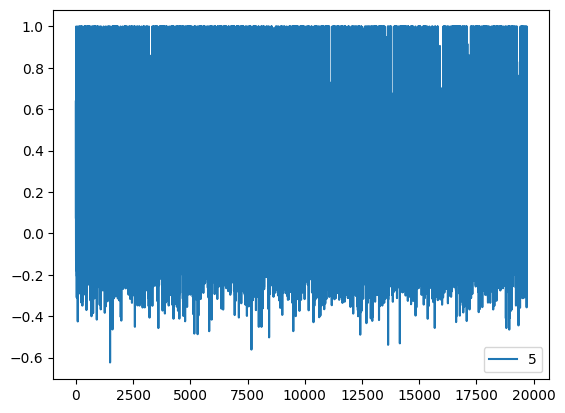

In [27]:
df[[5]].plot()

In [39]:
df

,class,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,1,-0.151072,-0.139539,0.134743,0.787261,0.068018,0.280133,0.682429,0.373443,0.654292,...,-0.045339,-0.045156,-0.045310,-0.045078,-0.044956,-0.045299,-0.045289,-0.045321,-0.045328,-0.045345
1,2,1.000000,0.733149,-0.048486,0.168585,0.085081,0.027195,-0.043824,0.037039,0.039543,...,-0.077720,-0.022738,0.109943,-0.055120,-0.084859,0.014189,-0.080332,-0.059399,-0.089629,-0.037842
2,2,-0.019246,0.005638,-0.020441,-0.020407,-0.014442,0.030673,1.000000,0.046754,0.043084,...,-0.080326,-0.057985,-0.066357,-0.075754,-0.044334,-0.066930,-0.049438,-0.005511,-0.081552,-0.064341
3,3,0.423517,0.413546,0.271968,0.193171,0.910699,1.000000,0.049027,-0.039834,-0.054681,...,-0.043890,0.539701,0.195154,-0.289049,0.261291,-0.187282,-0.248373,-0.292343,0.465181,-0.221006
4,2,0.056006,0.120815,0.044509,0.051259,1.000000,0.009132,0.016552,0.021882,-0.003181,...,-0.039248,-0.035300,-0.040864,-0.037515,-0.037755,-0.040651,-0.038275,-0.040960,-0.040445,-0.038172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19700,2,-0.028897,-0.028682,-0.026319,-0.023884,-0.028318,-0.012052,1.000000,-0.017358,0.065285,...,-0.057930,-0.055839,-0.054828,-0.055795,-0.058072,-0.056406,-0.050392,-0.051066,-0.057689,-0.058265
19701,1,-0.120733,-0.118573,1.000000,0.020786,0.550914,-0.026189,0.312667,-0.111190,-0.027472,...,-0.043245,-0.043054,-0.043323,-0.043269,-0.043363,-0.042998,-0.043253,-0.043255,-0.043361,-0.043318
19702,2,-0.036163,-0.005236,0.032165,0.073736,1.000000,0.092622,-0.029374,-0.037146,-0.013042,...,-0.006806,-0.052534,-0.038917,-0.039336,0.015867,-0.052018,-0.044556,-0.046317,-0.016849,-0.036681
19703,3,-0.043280,-0.033090,-0.052073,0.143073,-0.009496,0.285201,0.564066,1.000000,0.548814,...,-0.049727,-0.049847,-0.049180,-0.049467,-0.049280,-0.048561,-0.049449,-0.049515,-0.049143,-0.049390


In [19]:
with open('../Data/combined_t.pickle', 'wb') as f:
    pickle.dump(df, f)

In [13]:
pd.read_csv("../Data/combined1.csv")

,class,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,3,-0.023321,-0.023527,-0.022061,-0.022273,-0.017079,0.018815,1.000000,0.031178,-0.017721,...,91:-3.8098396e-02,92:-3.5813314e-02,93:-3.6717962e-02,94:-3.8129217e-02,95:-3.3561746e-02,96:-3.8832017e-02,97:-3.8019041e-02,98:-3.7385096e-02,99:-3.4282997e-02,100:-3.9099290e-02
1,1,-0.136421,-0.092407,-0.131769,0.574799,-0.073130,0.021133,0.099456,1.000000,0.614752,...,91:-4.2589937e-02,92:-4.5936204e-02,93:-4.5754614e-02,94:-4.5719734e-02,95:-4.5835595e-02,96:-4.5605169e-02,97:-4.4756584e-02,98:-4.6380653e-02,99:-4.3888360e-02,100:-4.5909698e-02
2,3,0.134293,0.138123,0.525289,1.000000,0.832403,0.659512,-0.047688,0.097587,0.014862,...,91:-1.9596822e-02,92:-4.6354712e-02,93:-1.6725040e-02,94:-1.1002547e-01,95:-7.4976855e-02,96:-2.0507028e-02,97:-8.1088361e-02,98:-1.1713542e-01,99:1.2461061e-01,100:-8.4322707e-02
3,3,0.712613,0.782345,0.190930,0.229841,0.560167,0.192150,1.000000,0.783759,-0.025315,...,91:6.3092581e-02,92:-2.0576355e-02,93:-5.4474981e-02,94:5.6441386e-02,95:-3.3762769e-02,96:-2.0097231e-02,97:-3.8448917e-02,98:-3.0611240e-02,99:1.5813792e-02,100:-2.9293789e-02
4,2,0.197980,0.300174,0.130691,0.802940,1.000000,0.099832,-0.009243,0.350689,0.281720,...,91:-6.3700347e-02,92:-4.7797177e-02,93:-3.2163624e-02,94:-5.6727206e-02,95:-6.4532205e-02,96:-3.9656799e-02,97:-5.4612141e-02,98:-4.2552237e-03,99:-4.6585556e-02,100:-5.3345626e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78818,3,-0.012863,0.012005,-0.018340,-0.009440,-0.033045,0.098008,1.000000,0.135341,0.145462,...,91:-6.9437976e-02,92:-2.3397587e-02,93:-7.2768707e-02,94:-3.6015956e-02,95:-5.9329850e-02,96:-5.4264111e-02,97:6.8717185e-02,98:-8.2764747e-02,99:-6.3361282e-02,100:-5.8120956e-02
78819,2,-0.024249,-0.024640,-0.021435,-0.038170,-0.020313,-0.011039,1.000000,0.070916,0.121450,...,91:-3.5992526e-02,92:-3.5162271e-02,93:-3.5776987e-02,94:-3.5664073e-02,95:-3.6002749e-02,96:-3.5998434e-02,97:-3.5591737e-02,98:-3.5893111e-02,99:-3.5913389e-02,100:-3.5752516e-02
78820,3,-0.059299,0.027528,-0.092111,0.653803,0.296419,1.000000,-0.040911,0.927669,-0.082818,...,91:-1.8453145e-01,92:-1.3405331e-02,93:3.5828184e-01,94:1.8589022e-01,95:4.7046963e-01,96:2.4250526e-01,97:2.4067383e-01,98:-1.0937155e-01,99:7.1049019e-02,100:6.1585692e-01
78821,3,-0.017755,0.003629,-0.001410,0.027432,0.071065,1.000000,0.003929,-0.015067,-0.013738,...,91:-2.7309133e-02,92:3.6662337e-03,93:-5.1605593e-02,94:-2.2456182e-02,95:1.3258753e-01,96:-1.0100029e-01,97:-9.8869978e-02,98:6.0841822e-02,99:-2.0553599e-02,100:-5.5325018e-02


In [2]:
with open('../Data/acoustic.pickle', 'rb') as f:
    d1 = pickle.load(f)
with open('../Data/seismic.pickle', 'rb') as f:
    d2 = pickle.load(f)
with open('../Data/combined.pickle', 'rb') as f:
    d = pickle.load(f)

In [3]:
d1

,class,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,2,-0.030057,-0.027216,-0.016126,0.006233,0.053416,1.000000,0.031091,0.015465,-0.013044,...,-0.029370,-0.030332,-0.023607,-0.031657,-0.028310,-0.031300,-0.031211,-0.030391,-0.030794,-0.031352
1,3,0.124642,1.000000,0.608303,0.008150,0.717687,-0.036154,-0.047996,-0.023177,-0.026854,...,-0.057607,-0.057537,-0.058274,-0.058113,-0.058398,-0.058491,-0.058231,-0.058531,-0.057697,-0.058402
2,3,-0.086143,-0.130700,-0.161727,-0.164976,0.577297,0.088806,-0.094891,1.000000,0.151082,...,-0.172071,-0.170827,-0.171194,-0.168016,-0.170520,-0.171233,-0.169749,-0.171479,-0.171045,-0.170937
3,3,-0.017615,0.021958,-0.002278,0.045736,1.000000,0.026328,-0.006924,-0.015067,0.009032,...,-0.031494,-0.031255,-0.031199,-0.030970,-0.031537,-0.031499,-0.030825,-0.031589,-0.031559,-0.031543
4,2,-0.013705,-0.021804,-0.019416,-0.017692,1.000000,-0.022303,-0.021477,-0.016256,-0.003198,...,-0.015685,-0.024433,-0.024608,-0.025368,-0.025230,-0.025162,-0.025535,-0.024619,-0.024239,-0.024822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78818,3,-0.196578,-0.190513,-0.189601,-0.190071,-0.134310,0.183397,1.000000,0.165482,0.058812,...,-0.192840,-0.195942,-0.191606,-0.193735,-0.195426,-0.195237,-0.193389,-0.194077,-0.193594,-0.195067
78819,3,-0.061304,-0.057746,-0.045711,-0.055745,0.027025,1.000000,0.027467,-0.001114,-0.034559,...,-0.057418,-0.058316,-0.053983,-0.059059,-0.059256,-0.057427,-0.058625,-0.056731,-0.053740,-0.050476
78820,3,0.919410,1.000000,0.368404,0.540824,0.348019,0.020499,-0.046345,-0.049503,-0.072119,...,-0.075835,-0.075814,-0.075791,-0.075812,-0.075693,-0.075819,-0.075829,-0.075817,-0.075885,-0.075873
78821,3,1.000000,0.135210,0.001155,0.033463,0.043519,-0.021910,0.156502,-0.017126,-0.022533,...,-0.032626,-0.032628,-0.032633,-0.032621,-0.032624,-0.032624,-0.032615,-0.032636,-0.032619,-0.032639


In [4]:
d2

,class,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,3,-0.311070,0.602284,-0.295414,-0.135353,-0.272519,0.470501,0.055555,0.350612,0.283464,...,-0.121085,0.458755,-0.287152,0.004847,-0.280585,-0.125173,0.010386,-0.288257,0.115472,0.013447
1,1,-0.036019,1.000000,0.044621,-0.017574,0.095875,-0.015582,-0.010842,-0.030141,-0.020132,...,-0.029158,-0.034659,-0.034904,-0.035061,0.006946,-0.035320,-0.032870,-0.015724,-0.032703,-0.035713
2,1,-0.102323,0.267455,0.789374,1.000000,-0.097091,-0.016171,0.186275,0.598286,-0.049404,...,-0.096673,-0.099150,-0.100942,-0.101388,-0.100168,-0.101975,-0.100745,-0.101671,-0.101034,-0.101691
3,3,-0.560520,-0.450013,0.732302,0.579498,0.405977,-0.554563,0.420540,0.075622,-0.501731,...,0.160053,0.183239,0.330863,-0.430148,-0.050102,-0.469018,-0.378305,-0.347293,-0.307555,0.100423
4,1,-0.062265,-0.059779,0.269739,0.126958,0.393020,1.000000,0.914650,-0.019336,-0.032771,...,-0.061744,-0.062252,-0.062077,-0.062227,-0.062246,-0.062236,-0.062251,-0.062113,-0.062113,-0.062244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78818,3,-0.269766,0.196617,0.072544,-0.194465,-0.109302,0.390684,-0.089140,-0.155741,1.000000,...,0.053338,0.100374,0.595054,0.099036,0.045020,0.042506,-0.061369,-0.189697,0.172433,-0.179482
78819,3,-0.027526,1.000000,-0.006795,-0.026603,-0.024834,-0.026691,-0.027017,-0.009539,-0.011659,...,-0.027411,-0.025038,-0.027022,-0.024138,-0.027477,-0.025119,-0.027264,-0.026643,-0.022561,-0.025719
78820,3,-0.119000,1.000000,-0.021042,0.098366,-0.013572,-0.012918,0.008290,0.012824,0.045739,...,-0.008321,0.119679,-0.042712,-0.104822,0.204603,0.005783,-0.094751,-0.004194,-0.043655,-0.109560
78821,1,-0.065489,-0.026753,0.904410,0.025899,0.353314,1.000000,0.005112,-0.002746,-0.028185,...,-0.061065,-0.064014,-0.063624,-0.065410,-0.065471,-0.064557,-0.064141,-0.065216,-0.062876,-0.065382


In [40]:
d['10'][0]

-0.021268309

In [ ]:
-0.030056818

In [30]:
(d['0'] == -0.030056818).sum()

0

In [41]:
a = []
for i in range(100):
    a.append((d[str(i)] == -0.021268309).sum())

In [42]:
a

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

0